In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## saving the wind generation data (the target variable) for all regions into dataframes

In [2]:
windgenDE = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DE_wind_generation')),
                        parse_dates=[0], index_col=0)

windgenFR = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('FR_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenPL = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('PL_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenDK = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DK_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenAT = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('AT_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

## saving the wind weather data (the features) into dataframes

In [3]:
windspeedDE = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_windspeed')),
                parse_dates=[0], index_col=0)

windspeedFR = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('FR_windspeed')),
                parse_dates=[0], index_col=0)

windspeedDK = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DK_windspeed')),
                parse_dates=[0], index_col=0)

windspeedPL = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('PL_windspeed')),
                parse_dates=[0], index_col=0)


windspeedAT = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('AT_windspeed')),
                parse_dates=[0], index_col=0)

## Next two cells are identical in purpose but if you get a tz-naive error you need to run the other block of code. The block of code needed differs based on system

In [4]:
start_remove = pd.to_datetime('2016-01-01')
end_remove = pd.to_datetime('2017-01-01')

start_test = pd.to_datetime('2015-01-01')
end_test = pd.to_datetime('2016-01-01')

In [5]:
# start_remove = pd.to_datetime('2016-01-01', utc = True)
# end_remove = pd.to_datetime('2017-01-01', utc = True)

# start_test = pd.to_datetime('2015-01-01', utc = True)
# end_test = pd.to_datetime('2016-01-01', utc = True)

## Limiting the data to just data from 2015 & 2016. Only these two years are consistent for most of the regions. Other years may be missing generation data

In [6]:
windspeedtrainFR = windspeedFR.loc[(windspeedFR.index >= start_remove) & (windspeedFR.index < end_remove)]
windgenerationtrainFR = windgenFR.loc[(windgenFR.index >= start_remove) & (windgenFR.index < end_remove)]

windspeedtestFR = windspeedFR.loc[(windspeedFR.index >= start_test) & (windspeedFR.index < end_test)]
windgenerationtestFR = windgenFR.loc[(windgenFR.index >= start_test) & (windgenFR.index < end_test)]

In [7]:
windspeedtrainDK = windspeedDK.loc[(windspeedDK.index >= start_remove) & (windspeedDK.index < end_remove)]
windgenerationtrainDK = windgenDK.loc[(windgenDK.index >= start_remove) & (windgenDK.index < end_remove)]

windspeedtestDK = windspeedDK.loc[(windspeedDK.index >= start_test) & (windspeedDK.index < end_test)]
windgenerationtestDK = windgenDK.loc[(windgenDK.index >= start_test) & (windgenDK.index < end_test)]

In [8]:
windspeedtrainPL = windspeedPL.loc[(windspeedPL.index >= start_remove) & (windspeedPL.index < end_remove)]
windgenerationtrainPL = windgenPL.loc[(windgenPL.index >= start_remove) & (windgenPL.index < end_remove)]

windspeedtestPL = windspeedPL.loc[(windspeedPL.index >= start_test) & (windspeedPL.index < end_test)]
windgenerationtestPL = windgenPL.loc[(windgenPL.index >= start_test) & (windgenPL.index < end_test)]

In [9]:
windspeedtrainAT = windspeedAT.loc[(windspeedAT.index >= start_remove) & (windspeedAT.index < end_remove)]
windgenerationtrainAT = windgenAT.loc[(windgenAT.index >= start_remove) & (windgenAT.index < end_remove)]

windspeedtestAT = windspeedAT.loc[(windspeedAT.index >= start_test) & (windspeedAT.index < end_test)]
windgenerationtestAT = windgenAT.loc[(windgenAT.index >= start_test) & (windgenAT.index < end_test)]

In [10]:
windspeedtrainDE = windspeedDE.loc[(windspeedDE.index >= start_remove) & (windspeedDE.index < end_remove)]
windgenerationtrainDE = windgenDE.loc[(windgenDE.index >= start_remove) & (windgenDE.index < end_remove)]

windspeedtestDE = windspeedDE.loc[(windspeedDE.index >= start_test) & (windspeedDE.index < end_test)]
windgenerationtestDE = windgenDE.loc[(windgenDE.index >= start_test) & (windgenDE.index < end_test)]

## changing the names of the columns in the features to one common name so that they concatenate properly

In [11]:
windspeedtrainFR = windspeedtrainFR.rename({"utc_timestamp": "timestamp", "FR_windspeed_10m": "windspeed"}, axis='columns')

In [12]:
windspeedtrainDK = windspeedtrainDK.rename({"utc_timestamp": "timestamp", "DK_windspeed_10m": "windspeed"}, axis='columns')

In [13]:
windspeedtrainPL = windspeedtrainPL.rename({"utc_timestamp": "timestamp", "PL_windspeed_10m": "windspeed"}, axis='columns')

In [14]:
windspeedtrainAT = windspeedtrainAT.rename({"utc_timestamp": "timestamp", "AT_windspeed_10m": "windspeed"}, axis='columns')

In [15]:
windspeedtrainDE = windspeedtrainDE.rename({"utc_timestamp": "timestamp", "DE_windspeed_10m": "windspeed"}, axis='columns')

In [16]:
windspeedformatted = pd.concat([windspeedtrainFR, windspeedtrainAT, windspeedtrainDK], sort=False)

## changing the names of the columns in the target variable to one common name so that they concatenate properly

In [17]:
windgenerationtrainFR = windgenerationtrainFR.rename({"utc_timestamp": "timestamp", "FR_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [18]:
windgenerationtrainDK = windgenerationtrainDK.rename({"utc_timestamp": "timestamp", "DK_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [19]:
windgenerationtrainPL = windgenerationtrainPL.rename({"utc_timestamp": "timestamp", "PL_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [20]:
windgenerationtrainAT = windgenerationtrainAT.rename({"utc_timestamp": "timestamp", "AT_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [21]:
windgenerationtrainDE = windgenerationtrainDE.rename({"utc_timestamp": "timestamp", "DE_wind_generation_actual": "wind_generation"}, axis='columns')

In [22]:
windgenerationdataformatted = pd.concat([windgenerationtrainFR, windgenerationtrainAT, windgenerationtrainDK], sort=False)

## The wind generation data is measured in Mega Watts and even then has a large magnitude. Here changing the magnitude so that it's in Giga Watts

In [23]:
windgenerationdataformatted = windgenerationdataformatted * 1e-3

In [24]:
windgenerationtestPL = windgenerationtestPL * 1e-3

In [25]:
windgenerationtestDE = windgenerationtestDE * 1e-3

In [26]:
windgenerationtrainDK = windgenerationtrainDK * 1e-3

In [27]:
windgenerationtrainFR = windgenerationtrainFR * 1e-3

In [28]:
windgenerationtrainAT = windgenerationtrainAT * 1e-3

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [30]:
#function to print out generation averages for hour and day. This is used as a visual representation of the data
#later will throw train data and predicted data to see how they fair
#summing up all the hourly generation numbers to product the total production for the year
#then doing division for the averages
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

## Creating the model fitting on the concatenated dataset and predicting on PL

In [31]:
# fitting the model with the concatenated dataset and target variables
model = LinearRegression().fit(windspeedformatted,windgenerationdataformatted)

In [32]:
# using trained model to predict on new set of wind features
prediction = model.predict(windspeedtestPL)

In [33]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

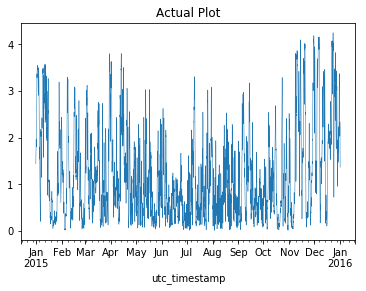

In [34]:
# plotting the actual generation plot
windgenerationtestPL.plot(linewidth=0.5, title='Actual Plot', legend=False)

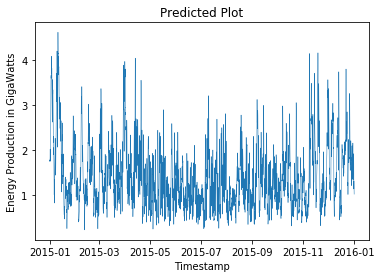

In [35]:
#plotting the predicted values
plt.plot(timeseries,prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [36]:
print(r2_score(windgenerationtestPL, prediction))

0.6502204090600145


In [37]:
print(mean_squared_error(windgenerationtestPL, prediction))

0.3428832401596897


In [38]:
energy_production(windgenerationtestPL)

Energy Data measured in Giga Watts
Total energy: PL_wind_onshore_generation_actual    10644.233554
dtype: float64
Average Energy Per Hour: PL_wind_onshore_generation_actual    1.215095
dtype: float64
Average Energy Per Day: PL_wind_onshore_generation_actual    29.162284
dtype: float64


In [39]:
energy_production(prediction)

Energy Data measured in Giga Watts
Total energy: 12570.012814646583
Average Energy Per Hour: 1.434932969708514
Average Energy Per Day: 34.438391273004335


## Using the same model to predict on DE wind data

In [40]:
DE_prediction = model.predict(windspeedtestDE)

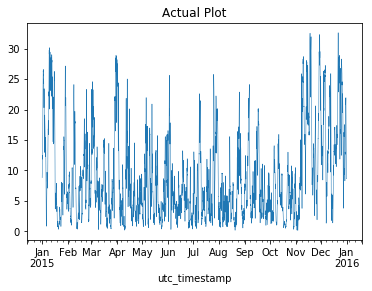

In [41]:
windgenerationtestDE.plot(linewidth=0.5, title='Actual Plot', legend=False)

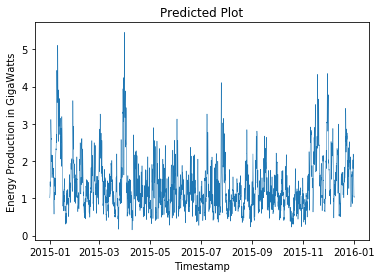

In [42]:
plt.plot(timeseries,DE_prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [43]:
print(r2_score(windgenerationtestDE, DE_prediction))

-0.9279441567294064


In [44]:
print(mean_squared_error(windgenerationtestDE, DE_prediction))

98.77404692458306


In [45]:
energy_production(windgenerationtestDE)

Energy Data measured in Giga Watts
Total energy: DE_wind_generation_actual    77468.975
dtype: float64
Average Energy Per Hour: DE_wind_generation_actual    8.84349
dtype: float64
Average Energy Per Day: DE_wind_generation_actual    212.243767
dtype: float64


In [46]:
energy_production(DE_prediction)

Energy Data measured in Giga Watts
Total energy: 11945.977305015178
Average Energy Per Hour: 1.3636960393852944
Average Energy Per Day: 32.72870494524706


## Train with just DK, test with PL

In [47]:
DK_model = LinearRegression().fit(windspeedtrainDK,windgenerationtrainDK)

In [48]:
DK_prediction = DK_model.predict(windspeedtestPL)

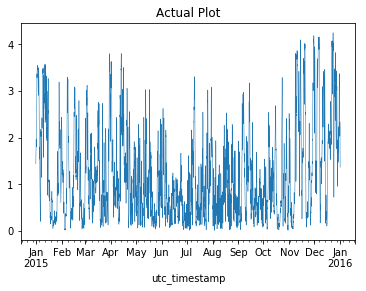

In [49]:
windgenerationtestPL.plot(linewidth=0.5, title='Actual Plot', legend=False)

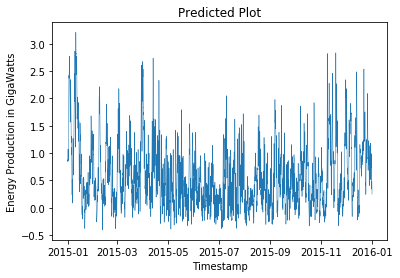

In [50]:
plt.plot(timeseries,DK_prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [51]:
print(r2_score(windgenerationtestPL, DK_prediction))

0.24894361626639683


In [52]:
print(mean_squared_error(windgenerationtestPL, DK_prediction))

0.7362483491536322


In [53]:
energy_production(windgenerationtestPL)

Energy Data measured in Giga Watts
Total energy: PL_wind_onshore_generation_actual    10644.233554
dtype: float64
Average Energy Per Hour: PL_wind_onshore_generation_actual    1.215095
dtype: float64
Average Energy Per Day: PL_wind_onshore_generation_actual    29.162284
dtype: float64


In [54]:
energy_production(DK_prediction)

Energy Data measured in Giga Watts
Total energy: 5134.125937251959
Average Energy Per Hour: 0.5860874357593561
Average Energy Per Day: 14.066098458224545


## Train on FR, test on PL

In [55]:
FR_model = LinearRegression().fit(windspeedtrainFR,windgenerationtrainFR)

In [56]:
FR_prediction = FR_model.predict(windspeedtestPL)

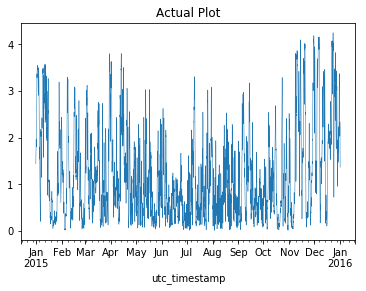

In [57]:
windgenerationtestPL.plot(linewidth=0.5, title='Actual Plot', legend=False)

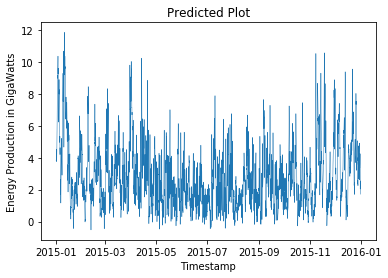

In [58]:
plt.plot(timeseries,FR_prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [59]:
print(r2_score(windgenerationtestPL, FR_prediction))

-3.499788716468996


In [60]:
print(mean_squared_error(windgenerationtestPL, FR_prediction))

4.411069642429848


In [61]:
energy_production(windgenerationtestPL)

Energy Data measured in Giga Watts
Total energy: PL_wind_onshore_generation_actual    10644.233554
dtype: float64
Average Energy Per Hour: PL_wind_onshore_generation_actual    1.215095
dtype: float64
Average Energy Per Day: PL_wind_onshore_generation_actual    29.162284
dtype: float64


In [62]:
energy_production(FR_prediction)

Energy Data measured in Giga Watts
Total energy: 25138.82441743749
Average Energy Per Hour: 2.869728814775969
Average Energy Per Day: 68.87349155462326


## Train on just AT and predict on PL

In [63]:
AT_model = LinearRegression().fit(windspeedtrainAT,windgenerationtrainAT)

In [64]:
AT_prediction = AT_model.predict(windspeedtestPL)

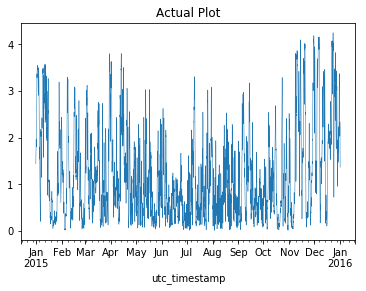

In [65]:
windgenerationtestPL.plot(linewidth=0.5, title='Actual Plot', legend=False)

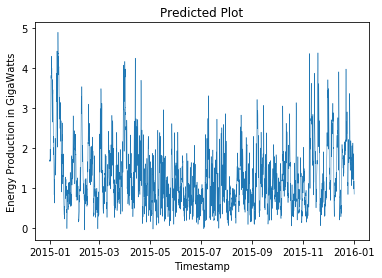

In [66]:
plt.plot(timeseries,AT_prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [67]:
print(r2_score(windgenerationtestPL, AT_prediction))

0.7032228016371608


In [68]:
print(mean_squared_error(windgenerationtestPL, AT_prediction))

0.290925857356912


In [69]:
energy_production(windgenerationtestPL)

Energy Data measured in Giga Watts
Total energy: PL_wind_onshore_generation_actual    10644.233554
dtype: float64
Average Energy Per Hour: PL_wind_onshore_generation_actual    1.215095
dtype: float64
Average Energy Per Day: PL_wind_onshore_generation_actual    29.162284
dtype: float64


In [70]:
energy_production(AT_prediction)

Energy Data measured in Giga Watts
Total energy: 11534.740538275817
Average Energy Per Hour: 1.3167512029995225
Average Energy Per Day: 31.60202887198854
